# Intro
## Problem
I wasn't sure what exactly to do with the data, so I decided to try to answer as many of the example problems given in the original github repository. I'd never worked with datasets in python using pandas and scikit-learn, so I learned a lot through this coding challenge.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Problem 1: Is there a most common star in the dataset?

<AxesSubplot:ylabel='Frequency'>

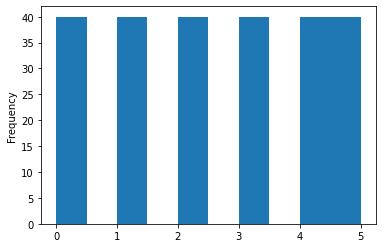

In [104]:
df = pd.read_csv('/kaggle/input/star-dataset/6 class csv.csv')
df['Star type'].plot(kind="hist")

It seems that out of the 240 entries in the csv, there is an equal distribution of stars, with each star type appearing 40 times.

## Problem 2: Is there a correlation between Temperature and star color?

<AxesSubplot:xlabel='Temperature (K)', ylabel='Star color'>

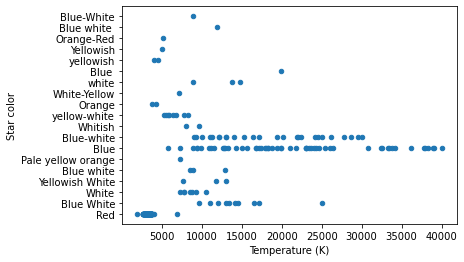

In [105]:
df.plot(kind='scatter', x='Temperature (K)',y='Star color')

There seems to be some correlation between temperature and star color, but due to the formatting of the star colors differing slightly, the graph presented is hard to read. Let's try to fix it.

<AxesSubplot:xlabel='Temperature (K)', ylabel='Star color'>

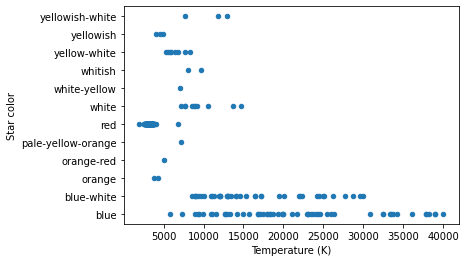

In [106]:
df['Star color'] = df['Star color'].str.lower()
df['Star color'] = df['Star color'].str.strip()
df['Star color'] = df['Star color'].str.replace(' ','-')

df.sort_values(by=['Star color'], inplace=True)
df.plot(kind='scatter', x='Temperature (K)',y='Star color')

This makes the data a bit easier to read, and we can see that blue stars are the only ones that tend to be over 32,000K, whereas red and orange stars are the coolest stars overall.

## Any other correlations?

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object


<AxesSubplot:xlabel='Star type', ylabel='Spectral Class'>

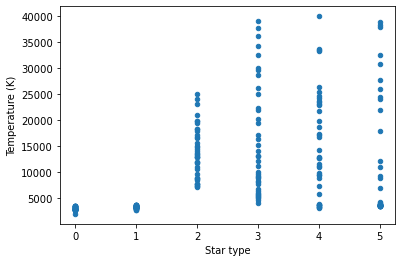

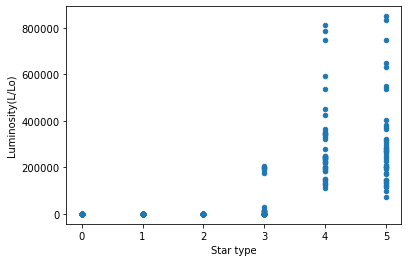

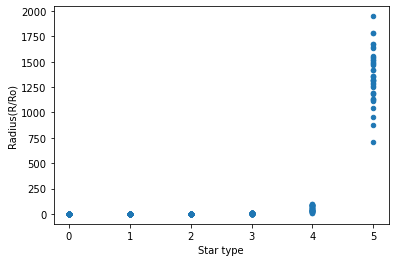

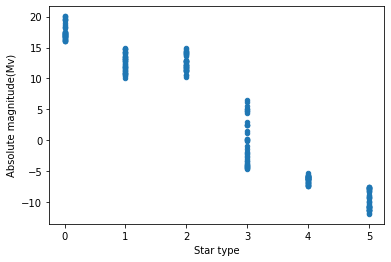

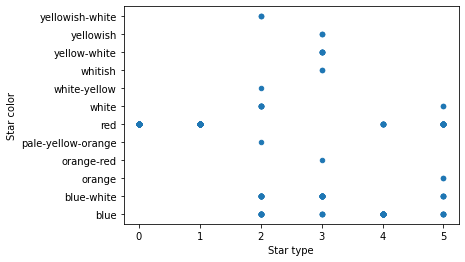

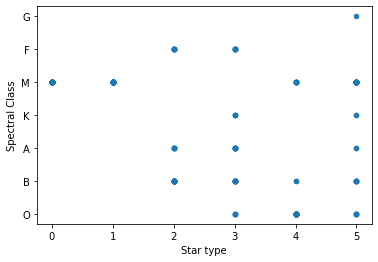

In [107]:
print(df.dtypes)
df.plot(kind='scatter', x='Star type',y='Temperature (K)')
df.plot(kind='scatter', x='Star type',y='Luminosity(L/Lo)')
df.plot(kind='scatter', x='Star type',y='Radius(R/Ro)')
df.plot(kind='scatter', x='Star type',y='Absolute magnitude(Mv)')
df.plot(kind='scatter', x='Star type',y='Star color')
df.plot(kind='scatter', x='Star type',y='Spectral Class')

## Problem 3: What properties are the most influential in classifying star type?
Looking at the graphs, it seems that Absolute magnitude, radius, and luminosity to some extent are the biggest indications of star type.

## Some extra graphs regarding spectral class instead of star type

<AxesSubplot:xlabel='Spectral Class', ylabel='Radius(R/Ro)'>

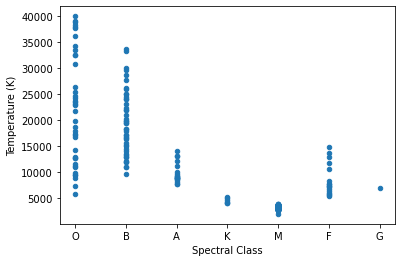

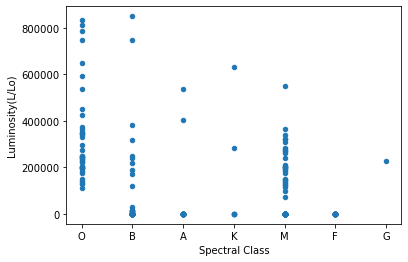

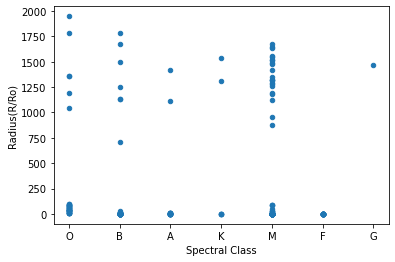

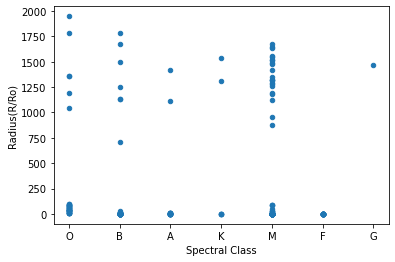

In [108]:
#Spectral Class
df.plot(kind='scatter', x='Spectral Class',y='Temperature (K)')
df.plot(kind='scatter', x='Spectral Class',y='Luminosity(L/Lo)')
df.plot(kind='scatter', x='Spectral Class',y='Radius(R/Ro)')
df.plot(kind='scatter', x='Spectral Class',y='Radius(R/Ro)')

## Problem 4: Creating a Hertzsprung-Russel diagram
Looking at the Kaggle diagram, it seems like the Herzsprung-Russel diagram is just a graph where absolute magnitude is plotted against the temperature, except the y axis and x axis were reversed

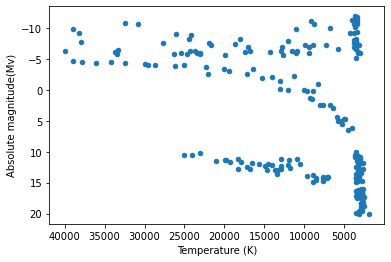

In [109]:
hr = df.plot(kind='scatter',x='Temperature (K)', y='Absolute magnitude(Mv)')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

The graph in Kaggle had each point colored differently to correspond with the star's color, so I decided to do the same

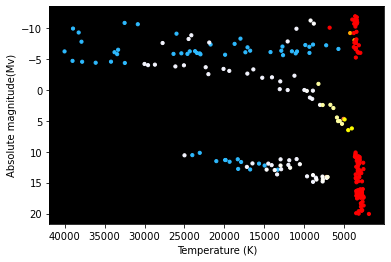

In [110]:
#current colors: yellowish-white, yellowish, yellow-white, whitish, white-yellow, white, red, pale-yellow-orange, orange-red orange, blue-white, blue
colors = colors = {'yellowish-white': '#FFFFF6', 'yellowish': '#FFFF00', 'yellow-white': '#FFFFA0', 'whitish': '#FAFAF7', 'white-yellow' : '#FBFBDD', 'white':'#FFFFFF', 'red':'#FF0000', 'pale-yellow-orange':'#FFD194', 'orange-red':'#F06A41', 'orange':'#FFA500','blue-white':'#F4F5FF','blue':'#2EBAFF'}
#map colors to each entry in dataframe
star_colors = df['Star color'].apply(lambda x: colors[x])

df.plot(kind='scatter',x='Temperature (K)', y='Absolute magnitude(Mv)', c=star_colors,s=10)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().set_facecolor('black')

## Modified version that turns x axis scaling to logarithmic

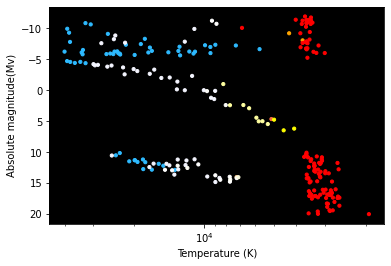

In [111]:
df.plot(kind='scatter',x='Temperature (K)', y='Absolute magnitude(Mv)', c=star_colors,s=10)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.gca().set_xscale('log')
plt.gca().set_facecolor('black')

This HR Diagram matches better with the graphs we previously saw, where red stars were the coolest and blue stars were the hottest. It dosen't exactly look like the one in the Kaggle page, but you can still sort of make out the main sequence and the white dwarfs and whatnot.

## Problem 5: Machine Learning Model for Star Type Prediction
This was by far the most time-consuming part of the challenge. The rest of the problems were essentially just graphing different parts of the data, but machine learning was a lot less intuitive for me. 
After some research, I chose scikit-learn as my library of choice.
First, let's see what datatypes we're working with again

In [112]:
df.dtypes

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object

Star color and Spectral class are objects (strings) but we can use sklearn's preprocessing tools to work around this.

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#define features and target, where target is what we want to predict and target is everything else
features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']
target = ['Star type']

#create preprocessor transformer
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), features[0:3]),('obj', OneHotEncoder(handle_unknown='ignore'), features[4:5])])

#create the pipeline using the preprocessor transformer and a decision tree classifier
pipe = Pipeline([('preprocessor', preprocessor),('decisiontreeclassifier', DecisionTreeClassifier())])

#split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size=.15, random_state=0)

#fit pipeline on training data
pipe.fit(x_train, y_train)

#generate predictions and print results
predictions = pipe.predict(x_test)
print(predictions)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test,predictions) * 100))

[4 1 3 1 4 4 3 4 3 1 1 2 2 3 5 1 0 5 4 0 4 5 2 0 0 2 1 3 1 4 5 4 2 0 2 5]
Accuracy: 100.00%


The result is an accuracy of 100%, but this was put together very roughly by watching tutorials, browsing stackoverflow, and skimming documentation, so there are probably various areas where it could be improved.
Note: Changing test size/random state seed resulted in an accuracy of under 100%, so I probably just got lucky with this result.

## Sources used
* https://pandas.pydata.org/docs/ (pandas docs)
* https://www.geeksforgeeks.org/ (various library docs and general python info)
* https://www.youtube.com/watch?v=vmEHCJofslg (youtube tutorial for pandas)
* https://scikit-learn.org/ (scikit docs)
* https://stackoverflow.com/questions/60190257/onehotencoder-valueerror-found-unknown-categories (fixing an error I had)